### Columns

#### People  
**ID**: Customer's unique identifier.   
**Year_Birth**: Customer's birth year.  
**Education**: Customer's education level.  
**Marital_Status**: Customer's marital status.  
**Income**: Customer's yearly household income.  
**Kidhome**: Number of children in customer's household.  
**Teenhome**: Number of teenagers in customer's household.  
**Dt_Customer**: Date of customer's enrollment with the company.  
**Recency**: Number of days since customer's last purchase.  
**Complain**: 1 if the customer complained in the last 2 years, 0 otherwise.  
#### Products   
**MntWines**: Amount spent on wine in last 2 years.  
**MntFruits**: Amount spent on fruits in last 2 years.  
**MntMeatProducts**: Amount spent on meat in last 2 years.  
**MntFishProducts**: Amount spent on fish in last 2 years.  
**MntSweetProducts**: Amount spent on sweets in last 2 years.  
**MntGoldProds**: Amount spent on gold in last 2 years.  

#### Promotion  
**NumDealsPurchases**: Number of purchases made with a discount.  
**AcceptedCmp1**: 1 if customer accepted the offer in the 1st campaign, 0 otherwise.  
**AcceptedCmp2**: 1 if customer accepted the offer in the 2nd campaign, 0 otherwise.  
**AcceptedCmp3**: 1 if customer accepted the offer in the 3rd campaign, 0 otherwise.  
**AcceptedCmp4**: 1 if customer accepted the offer in the 4th campaign, 0 otherwise.  
**AcceptedCmp5**: 1 if customer accepted the offer in the 5th campaign, 0 otherwise.  
**Response**: 1 if customer accepted the offer in the last campaign, 0 otherwise.  

#### Place  
**NumWebPurchases**: Number of purchases made through the company’s website.  
**NumCatalogPurchases**: Number of purchases made using a catalogue.  
**NumStorePurchases**: Number of purchases made directly in stores.  
**NumWebVisitsMonth**: Number of visits to company’s website in the last month.  

Load the [dataset](https://www.kaggle.com/datasets/imakash3011/customer-personality-analysis/data). 

In [33]:
import pandas as pd
import numpy as np

# cell 2: load TSV (tab-separated) and show head
csv_path = 'marketing_campaign.csv'

# Read as tab-separated (\t).
df = pd.read_csv(csv_path, sep='\t', encoding='utf-8', low_memory=False)
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0


In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

In [35]:
# cell 4: fill missing Income by group mean (Education + Marital Status), round stored values, and show the rows that were missing
from IPython.display import display
# find income column
income_cols = [c for c in df.columns if 'income' in c.lower()]
if not income_cols:
    raise KeyError("No column with name containing 'income' found in df.columns")
income_col = income_cols[0]
# remember which rows were missing originally
was_missing = df[income_col].isna()
missing_before = was_missing.sum()
print(f'Filling {missing_before} missing Income values (if any)')
# coerce to numeric
df[income_col] = pd.to_numeric(df[income_col], errors='coerce')
# find grouping columns (case-insensitive)
edu = next((c for c in df.columns if 'education' in c.lower()), None)
marital = next((c for c in df.columns if 'marital' in c.lower()), None)
if edu and marital:
    group_cols = [edu, marital]
    grp_mean = df.groupby(group_cols)[income_col].transform('mean')
    df[income_col] = df[income_col].fillna(grp_mean)
# fallback to overall mean for any remaining missing values
overall_mean = df[income_col].mean()
df[income_col] = df[income_col].fillna(overall_mean)
# round values in-place to nearest cent (this updates the DataFrame cells)
df[income_col] = df[income_col].round(2)
# show the rows that were originally missing, with all columns and rounded income
filled_rows = df.loc[was_missing].copy()
print(f'Rows originally missing: {len(filled_rows)}')
display(filled_rows)
# end of cell — only output is the list of filled rows as requested

Filling 24 missing Income values (if any)
Rows originally missing: 24


,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
10,1994,1983,Graduation,Married,50800.26,1,0,15-11-2013,11,5,...,7,0,0,0,0,0,0,3,11,0
27,5255,1986,Graduation,Single,51322.18,1,0,20-02-2013,19,5,...,1,0,0,0,0,0,0,3,11,0
43,7281,1959,PhD,Single,53314.61,0,0,05-11-2013,80,81,...,2,0,0,0,0,0,0,3,11,0
48,7244,1951,Graduation,Single,51322.18,2,1,01-01-2014,96,48,...,6,0,0,0,0,0,0,3,11,0
58,8557,1982,Graduation,Single,51322.18,1,0,17-06-2013,57,11,...,6,0,0,0,0,0,0,3,11,0
71,10629,1973,2n Cycle,Married,46201.10,1,0,14-09-2012,25,25,...,8,0,0,0,0,0,0,3,11,0
90,8996,1957,PhD,Married,58138.03,2,1,19-11-2012,4,230,...,9,0,0,0,0,0,0,3,11,0
91,9235,1957,Graduation,Single,51322.18,1,1,27-05-2014,45,7,...,7,0,0,0,0,0,0,3,11,0
92,5798,1973,Master,Together,52109.01,0,0,23-11-2013,87,445,...,1,0,0,0,0,0,0,3,11,0
128,8268,1961,PhD,Married,58138.03,0,1,11-07-2013,23,352,...,6,0,0,0,0,0,0,3,11,0


In [36]:
# cell 7: change Dt_Customer to a date datatype with format D-M-Y
df['Dt_Customer'] = pd.to_datetime(df['Dt_Customer'], format='%d-%m-%Y')

In [37]:
# cell 5: show descriptive statistics for each column
for col in df.columns:
    if df[col].dtype == 'object':
        # for categorical columns
        print(f"\nStatistics for {col}:")
        print(df[col].value_counts())
    elif df[col].dtype == 'datetime64[ns]':
        # for date columns
        print(f"\nStatistics for {col}:")
        print(f"Earliest date: {df[col].min()}")
        print(f"Latest date: {df[col].max()}")
    else:
        # for numeric columns
        print(f"\nStatistics for {col}:")
        print(f"Min: {df[col].min()}")
        print(f"Max: {df[col].max()}")


Statistics for ID:
Min: 0
Max: 11191

Statistics for Year_Birth:
Min: 1893
Max: 1996

Statistics for Education:
Education
Graduation    1127
PhD            486
Master         370
2n Cycle       203
Basic           54
Name: count, dtype: int64

Statistics for Marital_Status:
Marital_Status
Married     864
Together    580
Single      480
Divorced    232
Widow        77
Alone         3
Absurd        2
YOLO          2
Name: count, dtype: int64

Statistics for Income:
Min: 1730.0
Max: 666666.0

Statistics for Kidhome:
Min: 0
Max: 2

Statistics for Teenhome:
Min: 0
Max: 2

Statistics for Dt_Customer:
Earliest date: 2012-07-30 00:00:00
Latest date: 2014-06-29 00:00:00

Statistics for Recency:
Min: 0
Max: 99

Statistics for MntWines:
Min: 0
Max: 1493

Statistics for MntFruits:
Min: 0
Max: 199

Statistics for MntMeatProducts:
Min: 0
Max: 1725

Statistics for MntFishProducts:
Min: 0
Max: 259

Statistics for MntSweetProducts:
Min: 0
Max: 263

Statistics for MntGoldProds:
Min: 0
Max: 362

Statist

In [38]:
# cell 6: change 'Alone', 'Absurd', and 'YOLO' values of Marital_Status to 'Single'
df['Marital_Status'] = df['Marital_Status'].replace(['Alone', 'Absurd', 'YOLO'], 'Single')

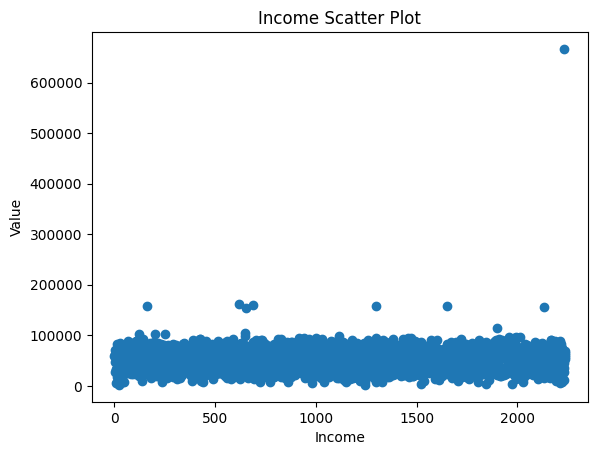

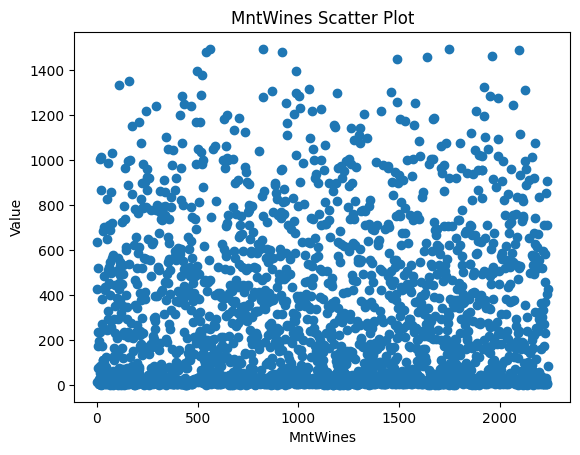

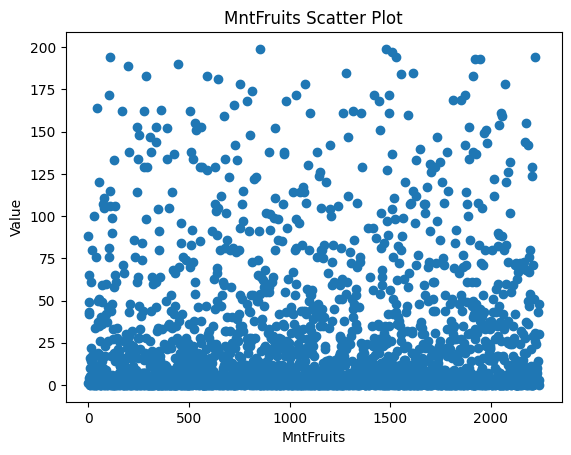

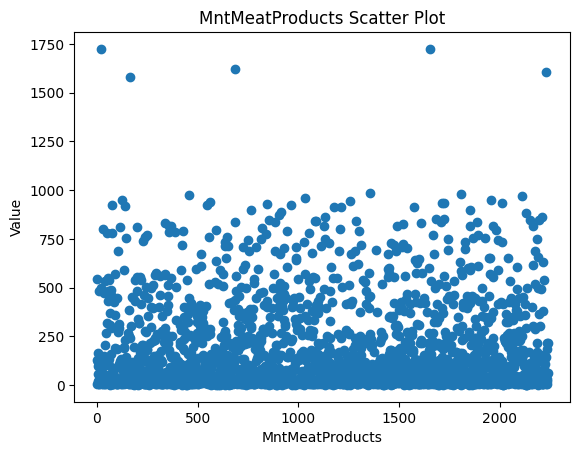

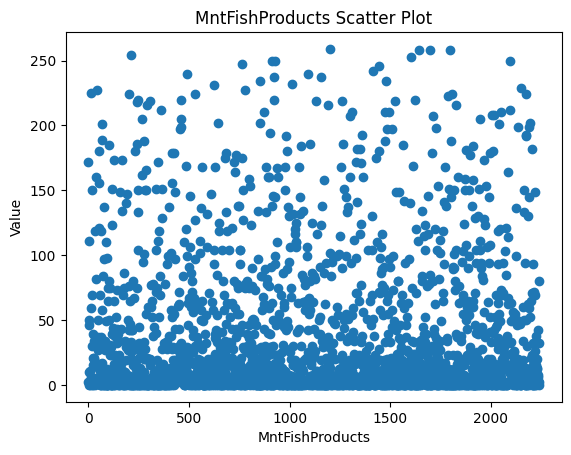

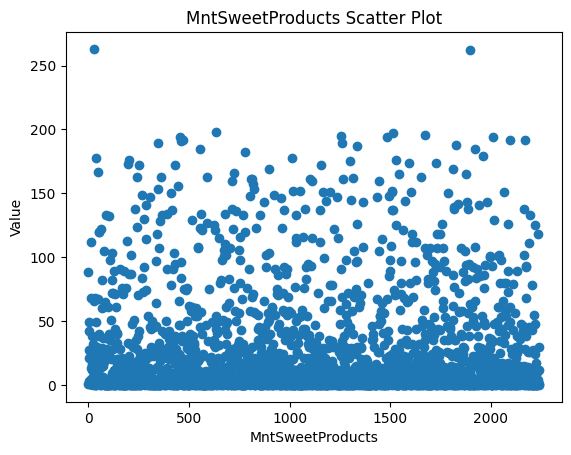

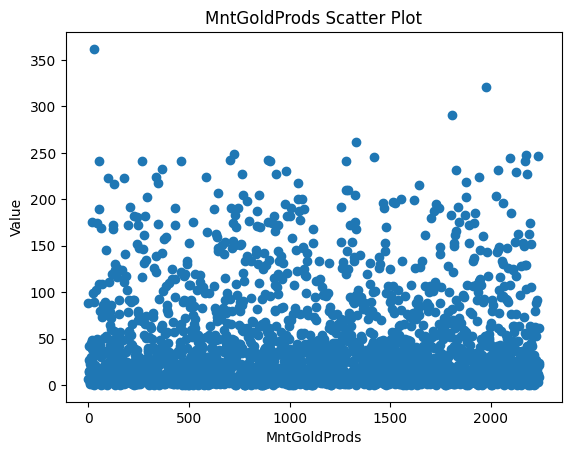

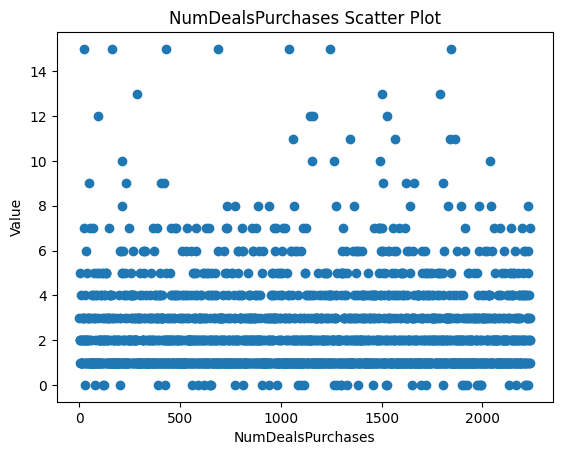

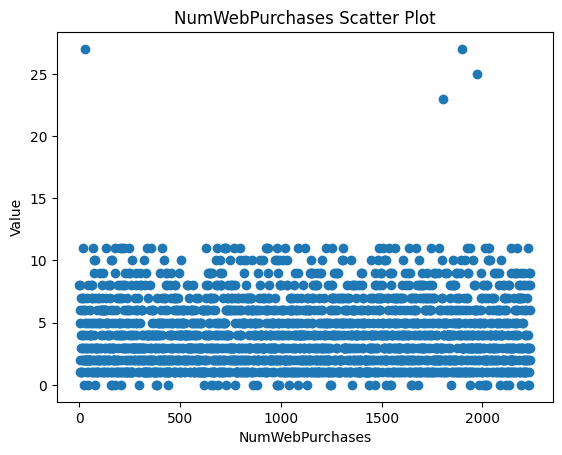

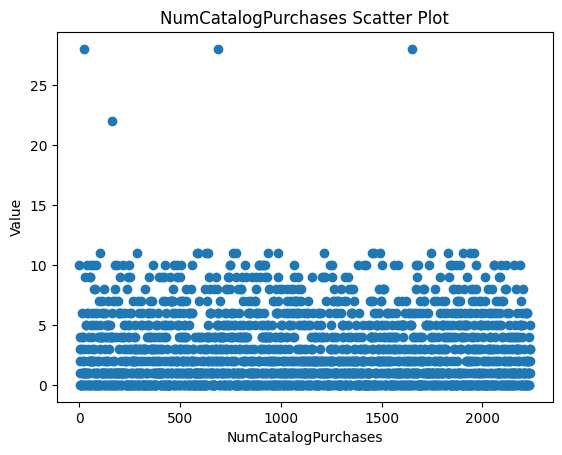

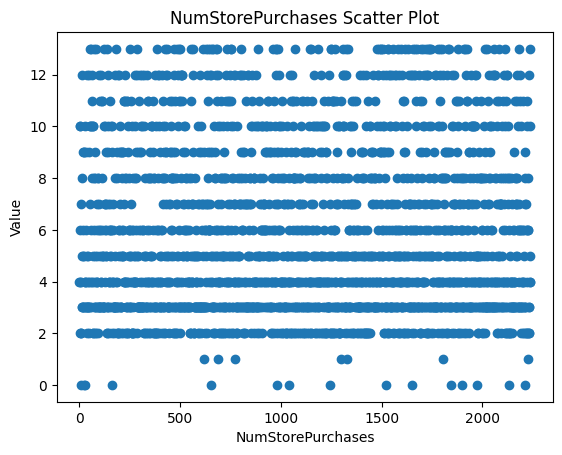

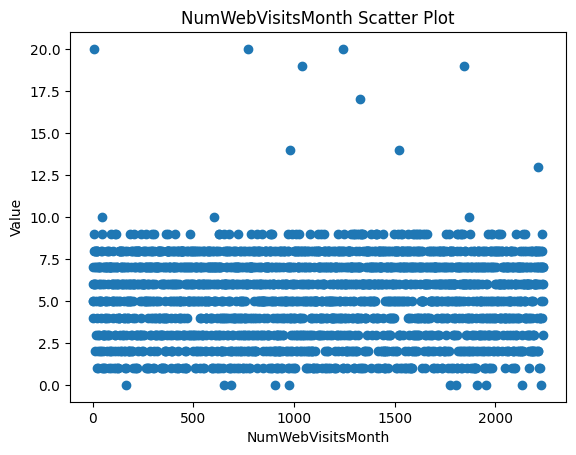

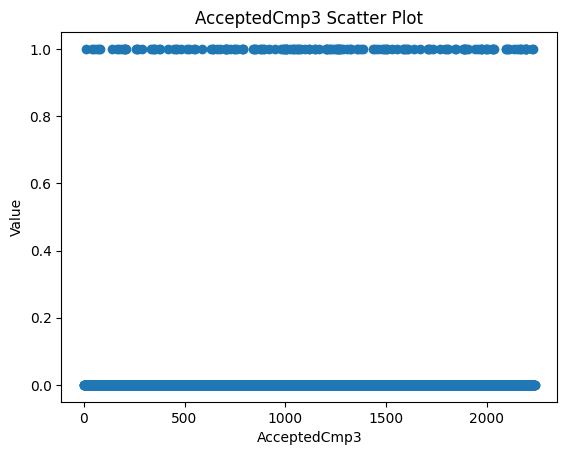

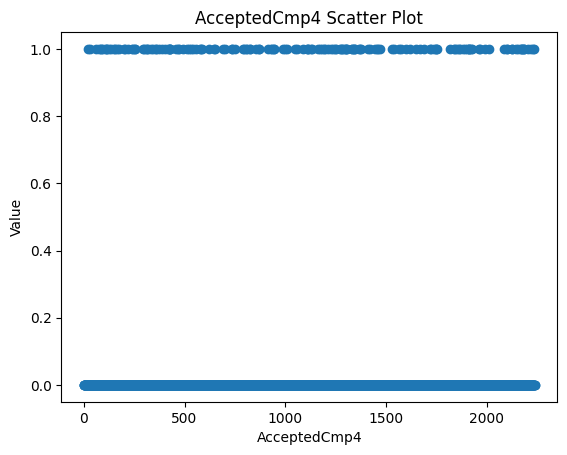

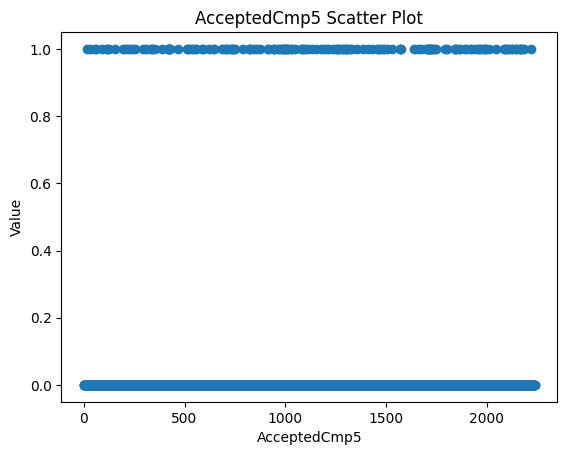

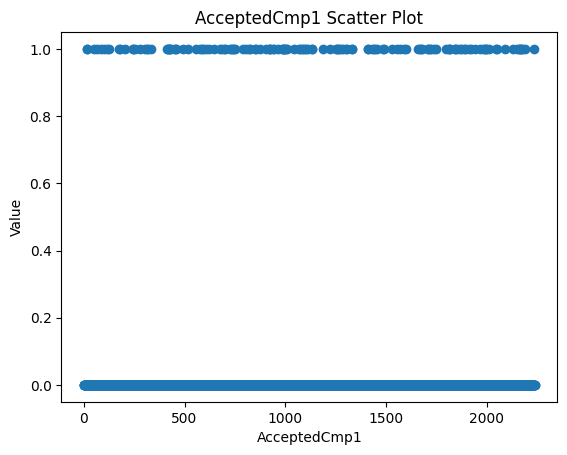

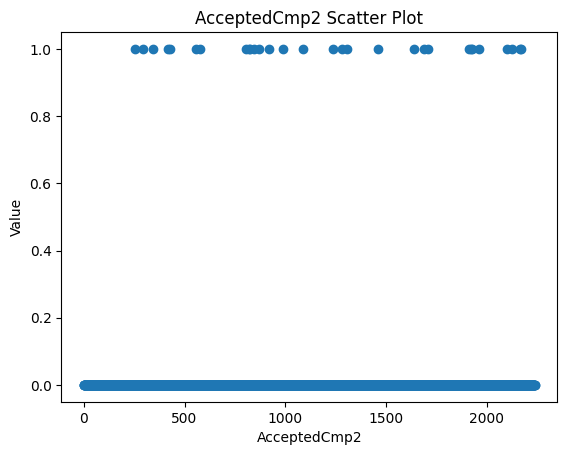

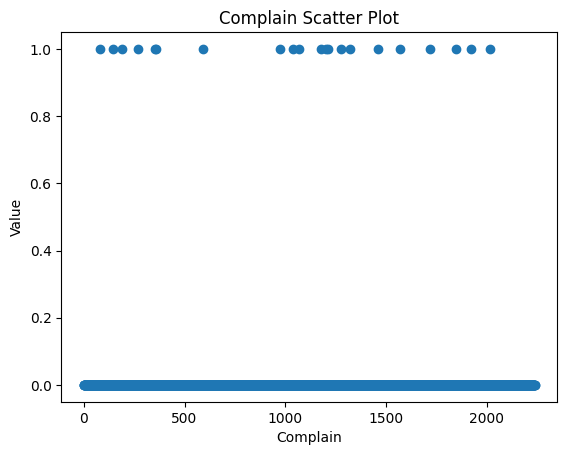

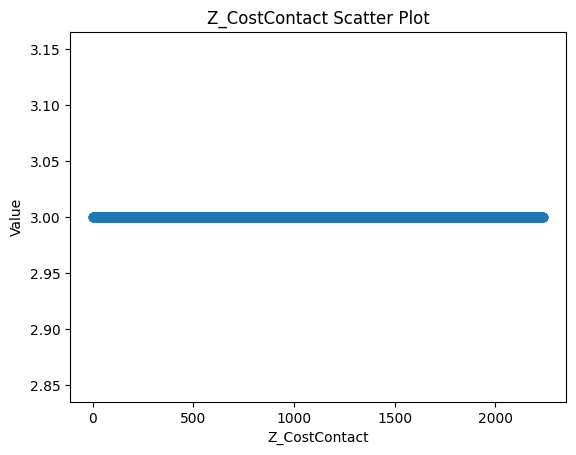

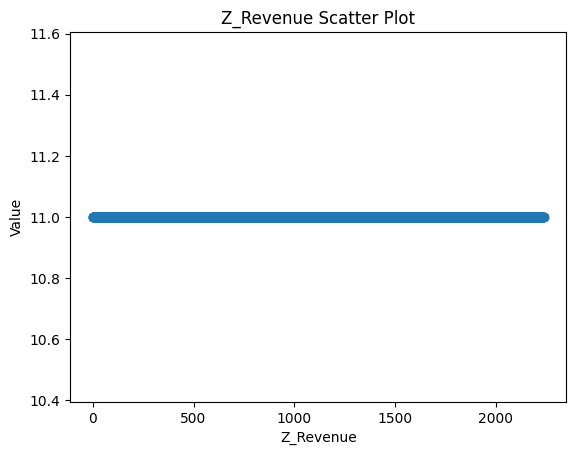

In [39]:
import matplotlib.pyplot as plt
import seaborn as sns

# Select the features for plotting
variables = df[['Income', 'MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1', 'AcceptedCmp2', 'Complain', 'Z_CostContact', 'Z_Revenue']]

# Loop through each variable
for var in variables:
    # Check the data type
    if variables[var].dtype == 'float64' or variables[var].dtype == 'int64':
        # Plot a scatter plot if the variable is numerical
        plt.scatter(df.index, variables[var])
        plt.xlabel(var)
        plt.ylabel('Value')
        plt.title(f'{var} Scatter Plot')
        plt.show()
    elif variables[var].dtype == 'object':
        # Plot a bar plot if the variable is categorical
        sns.countplot(x=df[var], data=df)
        plt.xlabel(var)
        plt.ylabel('Count')
        plt.title(f'{var} Bar Plot')
        plt.show()

In [40]:
df = df.drop(['Z_CostContact', 'Z_Revenue'], axis=1)

In [41]:
df = df[df['Income'] <= 600000]

Model

In [42]:
from sklearn.cluster import AgglomerativeClustering

# Select the features for clustering
X = df[['Income', 'MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1', 'AcceptedCmp2', 'Complain']]

# Perform hierarchical clustering
model = AgglomerativeClustering(n_clusters=3, metric='euclidean', linkage='ward')
clusters = model.fit_predict(X)

# Print the cluster assignments
print("Cluster Assignments:")
print(pd.DataFrame({'ID': df['ID'], 'Cluster': clusters}))

Cluster Assignments:
         ID  Cluster
0      5524        0
1      2174        0
2      4141        2
3      6182        1
4      5324        0
...     ...      ...
2235  10870        0
2236   4001        0
2237   7270        0
2238   8235        0
2239   9405        0

[2239 rows x 2 columns]


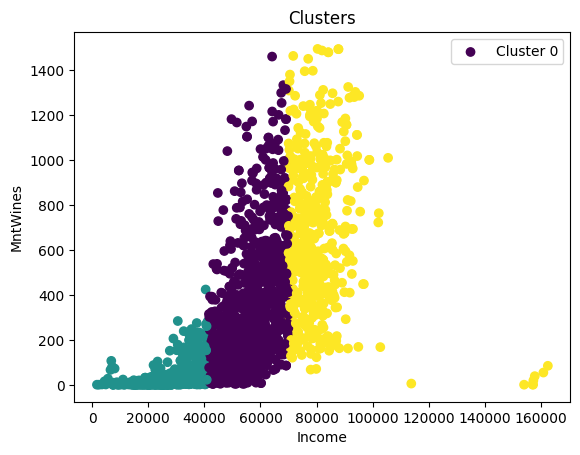

In [43]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot the clusters
plt.scatter(X['Income'], X['MntWines'], c=clusters)
plt.xlabel('Income')
plt.ylabel('MntWines')
plt.title('Clusters')
plt.legend(['Cluster 0', 'Cluster 1', 'Cluster 2'])
plt.show()